## Import data & libraries

In [ ]:
!pip install pandas_ta

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import missingno as msno
from google.colab import data_table
from tabulate import tabulate
import scipy.stats as st
import matplotlib.patches as mpl_patches
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import describe
import matplotlib.cm as cm
import matplotlib.lines as mlines
from pandas.core.window.rolling import Rolling
import pandas_ta as ta

In [ ]:
final_df = pd.read_csv('/content/drive/MyDrive/Self Case studies/CS01 Bitcoin Price Forecasting/Data/01 Raw imputed data /final_data_imputed_20210919.csv')
final_df

,Date,opening_price,highest_price,lowest_price,closing_price,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,avg_hashrate,mining_profitability,sent_coins_in_usd,avg_transaction_fees,median_transaction_fees,avg_block_time,avg_transaction_value,median_transaction_value,tweets,google_trends,active_addresses,top100_to_total_percentage,avg_fee_to_reward,number_of_coins_in_circulation,miner_revenue,next_day_closing_price
0,2013-01-01,13.5,13.6,13.2,13.3,31734,89033,26174,2979637,2.433154e+13,2246.000,18839472,0.0107,0.00670,8.889,625.432,14.518,8193.0,1.194000,37846.0,19.536,0.627,10621175.00,5.264860e+04,13.3
1,2013-01-02,13.3,13.4,13.2,13.3,39280,114077,31809,2979637,2.280465e+13,2233.000,23851896,0.0108,0.00660,9.412,650.617,14.514,8193.0,1.497000,43104.0,19.597,0.835,10621575.00,5.486525e+04,13.4
2,2013-01-03,13.3,13.5,13.3,13.4,42147,108023,38197,2979637,2.372489e+13,2276.000,20921297,0.0118,0.00661,8.889,542.730,19.732,8193.0,1.798000,51268.0,19.621,0.925,10628700.00,4.811833e+04,13.5
3,2013-01-04,13.4,13.5,13.3,13.5,48436,141811,34990,2979637,2.260818e+13,2259.000,29527613,0.0105,0.00661,9.412,632.431,11.384,8193.0,1.841000,47341.0,19.540,1.000,10632425.00,5.087274e+04,13.4
4,2013-01-05,13.5,13.6,13.3,13.4,39455,118240,38008,2979637,2.259070e+13,2074.000,26851599,0.0105,0.00659,10.213,697.556,13.945,8193.0,1.826000,53417.0,19.543,0.885,10633200.00,5.139673e+04,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,2021-09-14,44950.2,47247.6,44718.7,47077.5,267959,599399,472333,18415156832118,1.555172e+20,0.315,383329472546,2.5480,0.72000,8.571,1932378.000,717.117,91267.0,108.864900,793939.0,15.218,1.394,18816150.00,4.946986e+07,48130.6
3179,2021-09-15,47070.8,48436.5,46743.9,48130.6,268815,736726,459889,18415156832118,1.330283e+20,0.323,48228727220,3.0180,0.86300,10.141,702497.000,773.643,109407.0,111.309556,823392.0,15.186,1.887,18817025.00,4.302687e+07,47748.0
3180,2021-09-16,48132.3,48480.6,47040.3,47748.0,271087,817607,436025,18415156832118,1.302297e+20,0.319,42137524406,2.9660,0.80800,10.588,766989.000,719.701,90855.0,113.459125,879832.0,15.185,1.938,18817900.00,4.144786e+07,47282.8
3181,2021-09-17,47748.2,48155.9,46788.8,47282.8,270893,720056,384965,18415156832118,1.272835e+20,0.349,29613757834,2.6310,0.71200,9.796,612387.000,714.990,101046.0,116.526571,823793.0,15.177,1.605,18818781.25,4.500074e+07,48306.7


In [ ]:
def feature_smoothening(df,feature_name,smoothening_type,smoothening_range=[7,30,90],show_plot=False,show_original_Feature_in_plot=True):
    if smoothening_type == 'sma':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.sma(df[feature_name],j) 

    elif smoothening_type == 'var':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.variance(df[feature_name],j)

    elif smoothening_type == 'stdev':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.stdev(df[feature_name],j)
    
    elif smoothening_type == 'ema':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.ema(df[feature_name],j)

    elif smoothening_type == 'wma':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.wma(df[feature_name],j)

    elif smoothening_type == 'rsi':
        for j in smoothening_range:
             df[f'{smoothening_type}{j} {feature_name}'] = ta.rsi(df[feature_name],j)

    elif smoothening_type == 'roc':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.roc(df[feature_name],j)  

    elif smoothening_type == 'dema':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.dema(df[feature_name],j) 

    elif smoothening_type == 'tema':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.tema(df[feature_name],j) 

    elif smoothening_type == 'bband_lower':
        for j in smoothening_range:
            bband_df = ta.bbands(df[feature_name],j)
            df[f'{smoothening_type}{j} {feature_name}'] = bband_df[f'BBL_{j}_2.0']

    elif smoothening_type == 'bband_upper':
        for j in smoothening_range:
            bband_df = ta.bbands(df[feature_name],j)
            df[f'{smoothening_type}{j} {feature_name}'] = bband_df[f'BBU_{j}_2.0']

    elif smoothening_type == 'macd':
        macd_df = ta.macd(df[feature_name])
        df[f'{smoothening_type} hist {feature_name}'] = macd_df['MACDh_12_26_9']
        df[f'{smoothening_type} signal {feature_name}'] = macd_df['MACDs_12_26_9']
        df[f'{smoothening_type} {feature_name}'] = macd_df['MACD_12_26_9']

    
    if show_plot == True and show_original_Feature_in_plot==True :
        df[[feature_name]+[i for i in list(df.columns) if i.split(" ")[-1] == feature_name and i.split(" ")[0][0:len(smoothening_type)] == smoothening_type]].plot(kind='line',figsize=(25,5))
        plt.grid()
        plt.title(f'Feature Smoothening-{feature_name} by {smoothening_type}')
        plt.xticks([])
        plt.show()

    elif show_plot == True and show_original_Feature_in_plot==False :
        df[[i for i in list(df.columns) if i.split(" ")[-1] == feature_name and i.split(" ")[0][0:len(smoothening_type)] == smoothening_type]].plot(kind='line',figsize=(25,5))
        plt.grid()
        plt.title(f'Feature Smoothening-{feature_name} by {smoothening_type}')
        plt.xticks([])
        plt.show()

In [ ]:
feature_list = [i for i in list(final_df.columns) if i not in ['Date','next_day_closing_price']]

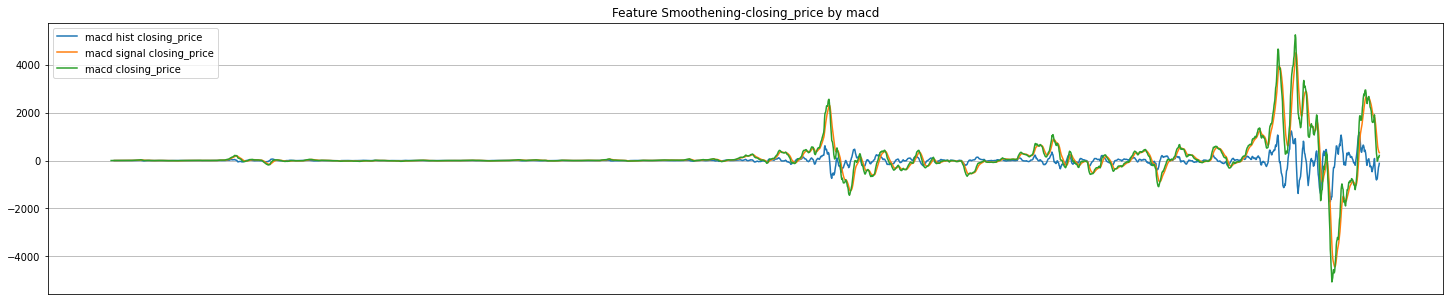

In [ ]:
feature_smoothening(final_df,'closing_price','macd',show_plot=True,show_original_Feature_in_plot=False)

## Simple Moving Average
* A simple moving average (SMA) calculates the average of a selected range of feature values for a number of periods in that range.

* It determins if an asset price will continue or if it will reverse a bull or bear trend.

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'sma',show_plot=True)

## Weighted Moving Average
* While calculating average, It assigns a greater weighting to the most recent data points, and less weighting to data points in the distant past.
![](https://www.thebalance.com/thmb/2bdOUTOzQ0qbp0Y-1ZO_AITMVeg=/2364x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/WMA-2cada5373e76459a947b8c7fc106f41e.jpg)

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'wma',show_plot=True)

## Exponential Moving Average
* The EMA is a moving average that places a greater weight and significance on the most recent data points. They work similar to WMA but formula is different.
![Image](https://www.thebalance.com/thmb/bUl41pugmmQnuoLXScHzSAAla3c=/1648x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/EMA-a566789cf300425c80352fb70a6c0666.jpg)
* The EMA adapts more quickly to price changes than the SMA does. For example, when a price reverses direction, the EMA will reverse direction more quickly than the SMA will, because the EMA formula gives more weight to recent prices and less weight to prices from the past.


In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'ema',show_plot=True)

## Double Exponential Moving Average
* DEMA responds more quickly to near-term price changes than a normal exponential moving average (EMA). 
 
 ![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/301d4b6f039d7c29ea9d5bf4441e533cd50d72c7)

* It helps to filter out noise

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'dema',show_plot=True)

## Triple Exponential Moving Average
* It uses multiple EMA calculations and subtracts the lag to create a trend following indicator that reacts quickly to price changes.
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/172c4c79a35109d293d720ef2865581c632800d4)

* The TEMA reacts to price changes quicker than a traditional MA or EMA will. This is because some of the lag has been subtracted out in the calculation.

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'tema',show_plot=True)

## Standard Deviaiton
* Standard deviation is the statistical measure of market volatility, measuring how widely feature values are dispersed from the average feature values. 
* If feature values trade in a narrow trading range, the standard deviation will return a low value that indicates low volatility. 
* Conversely, if feature values swing wildly up and down, then standard deviation returns a high value that indicates high volatility.

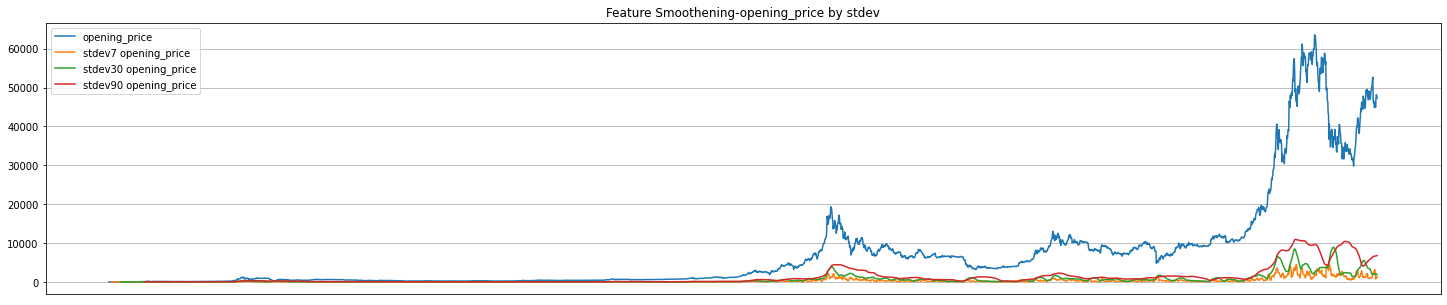

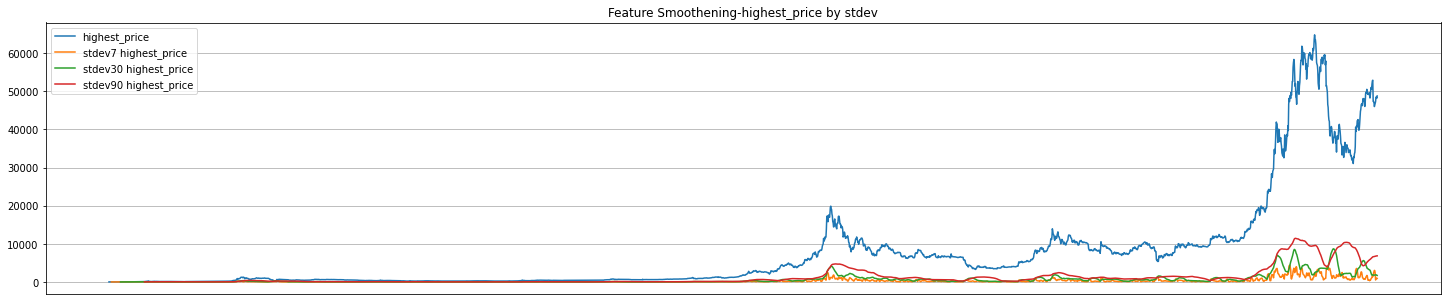

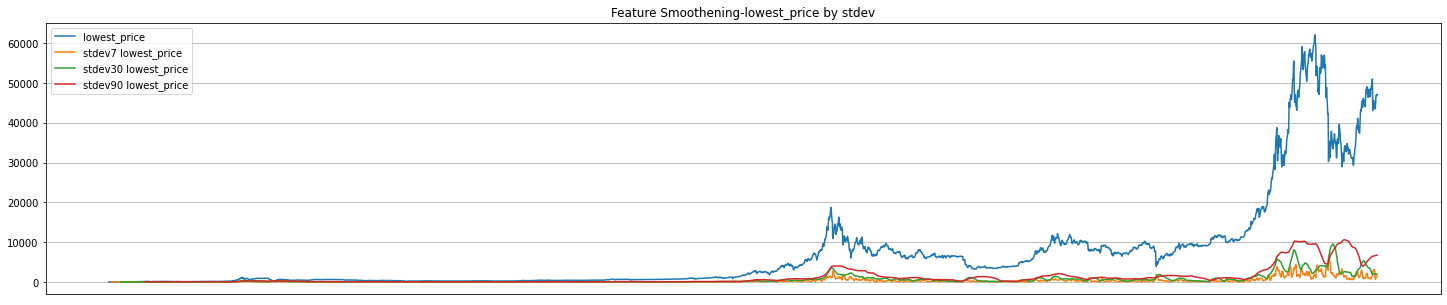

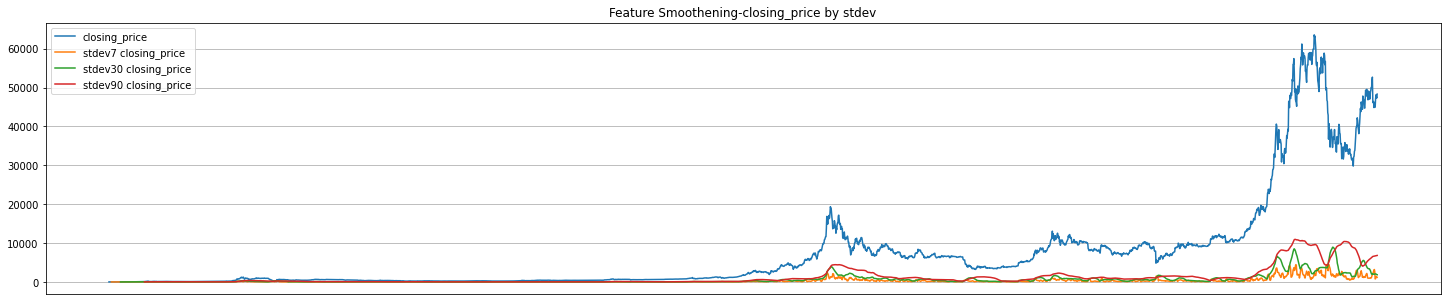

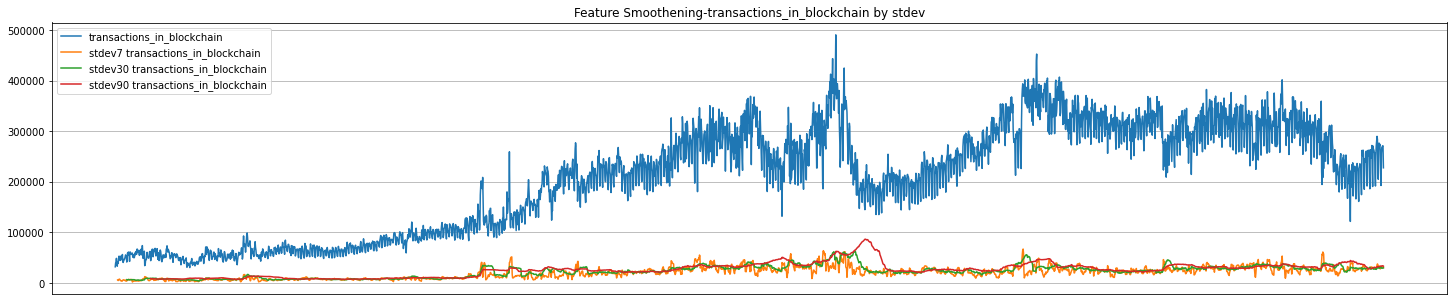

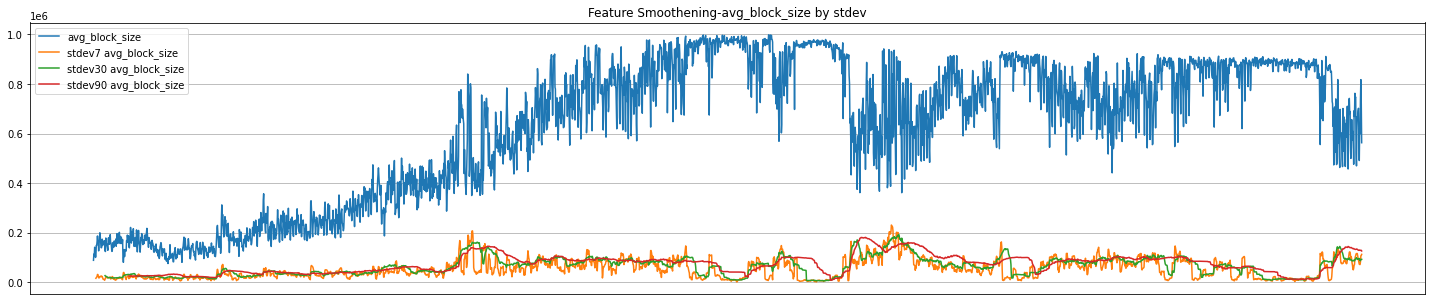

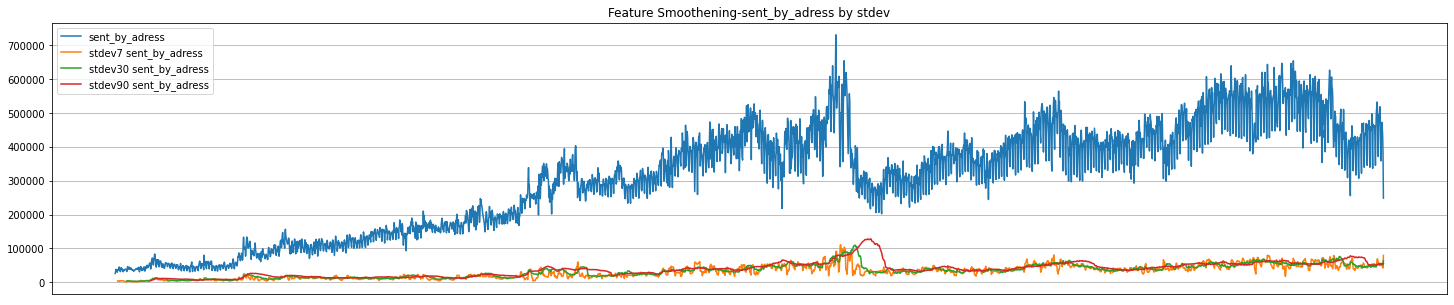

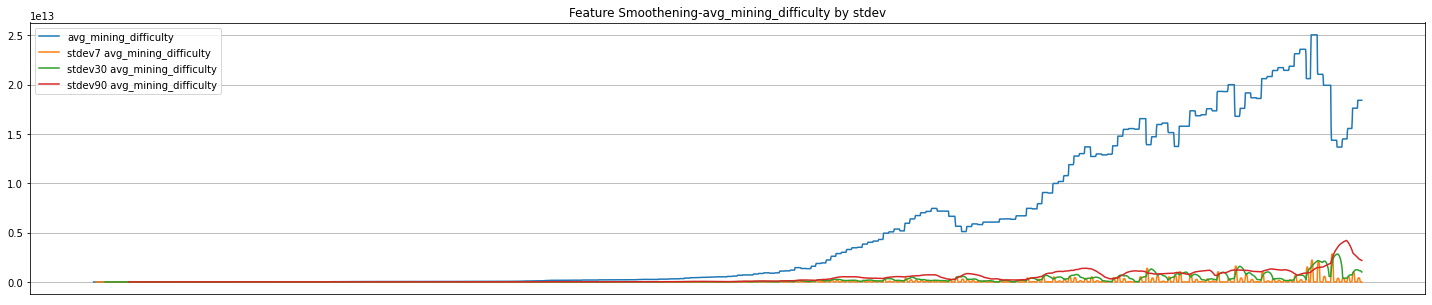

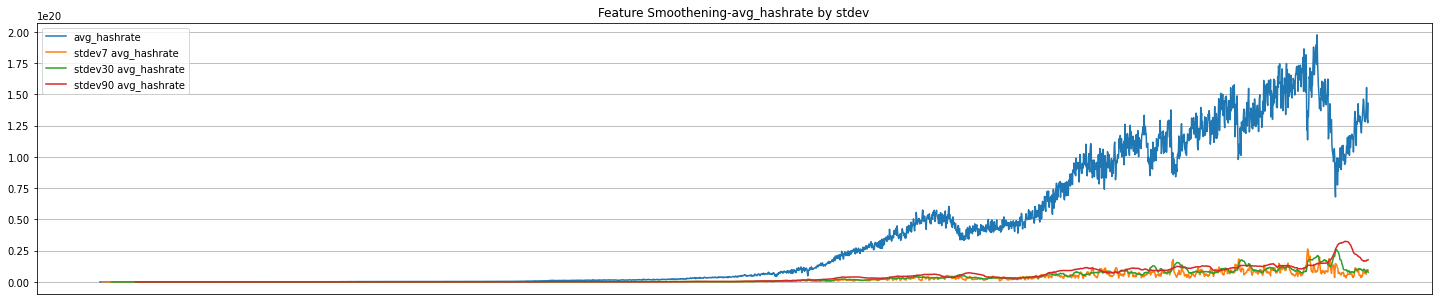

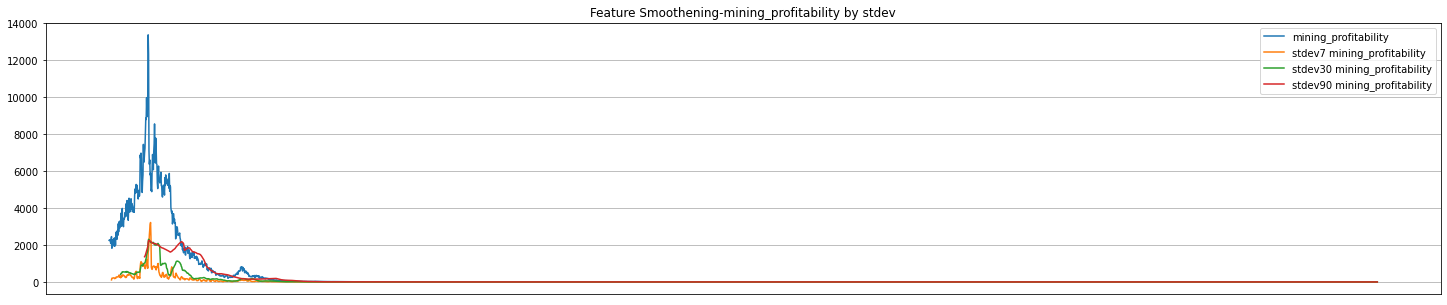

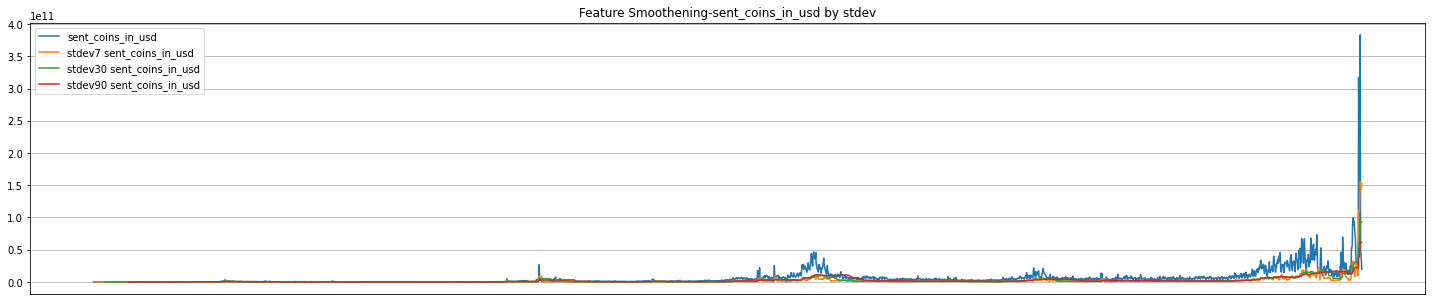

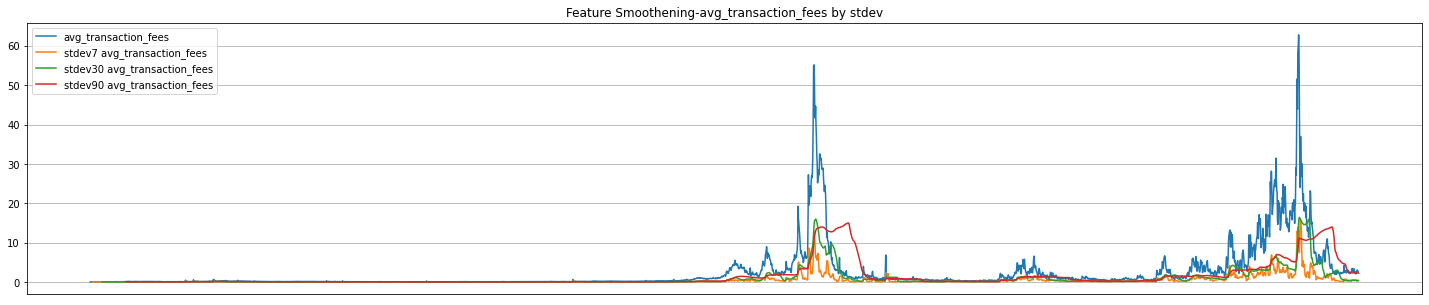

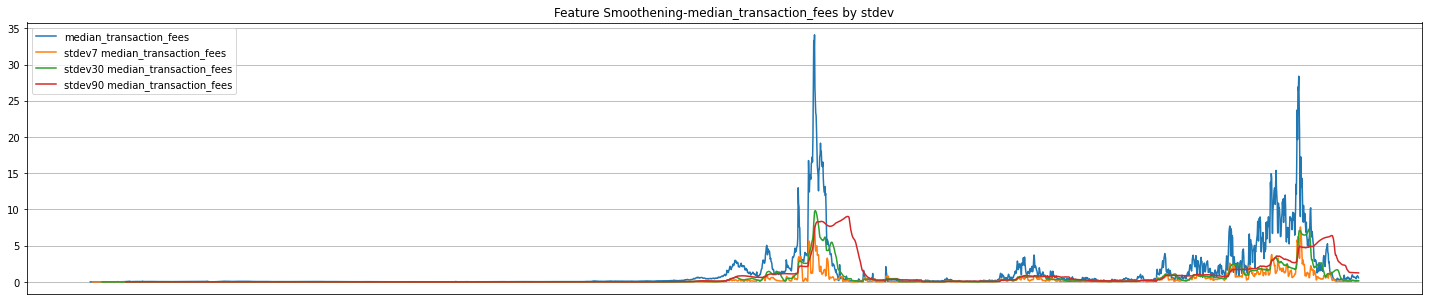

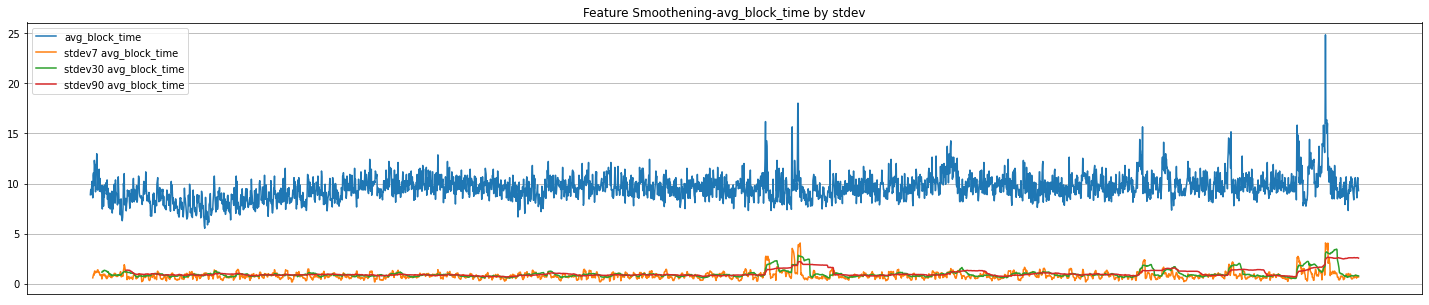

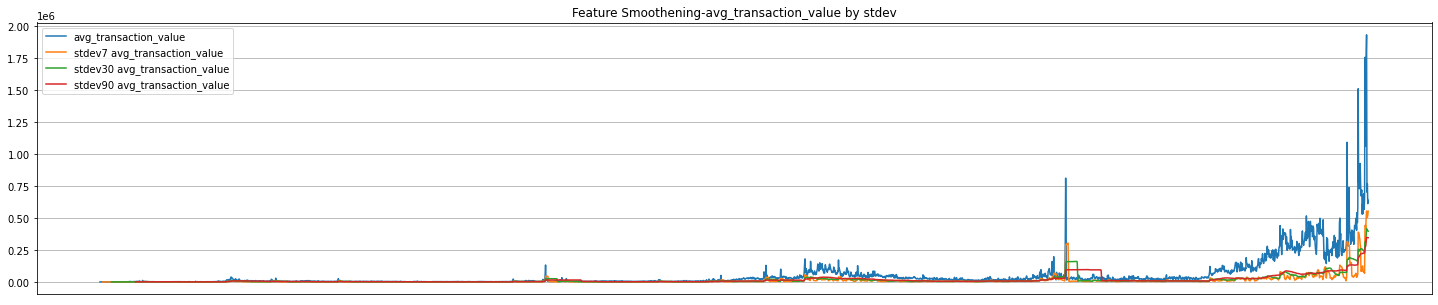

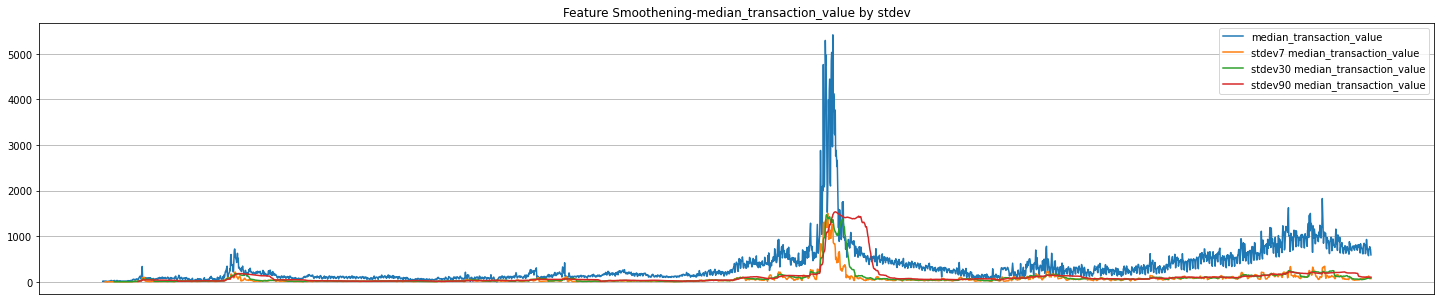

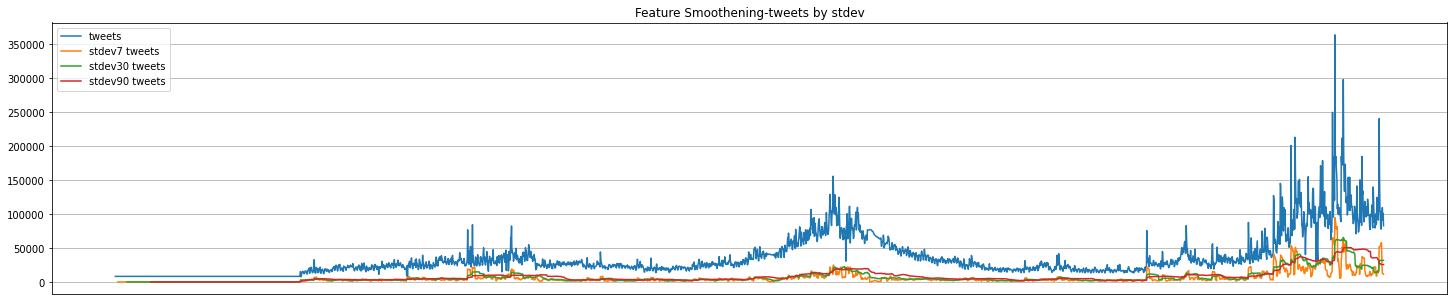

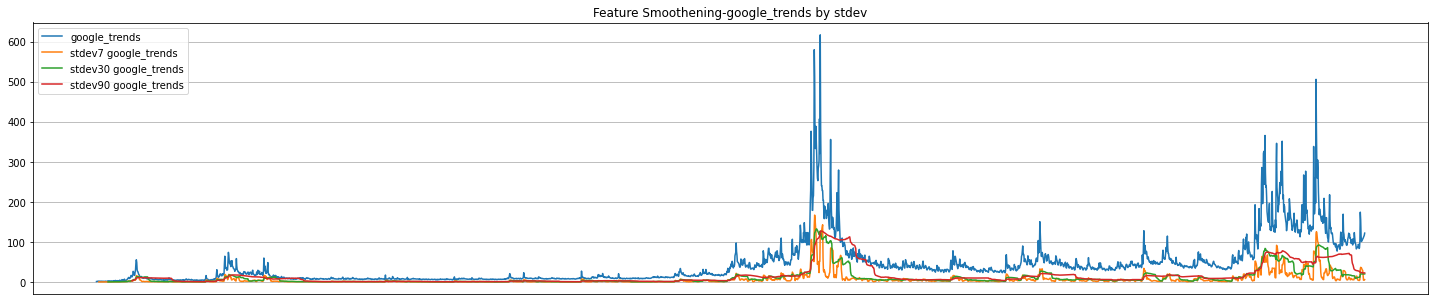

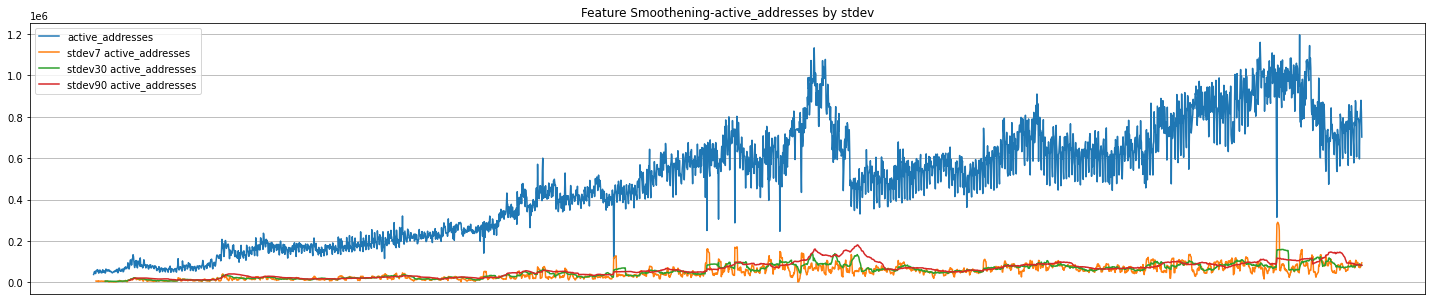

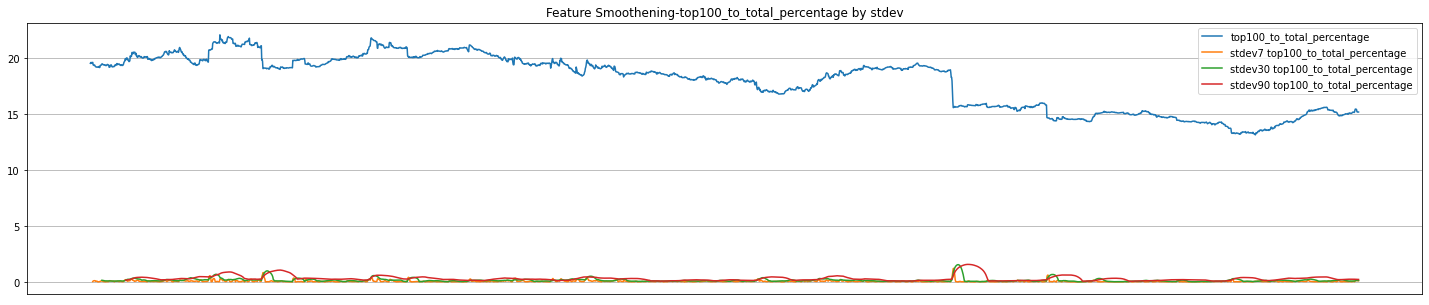

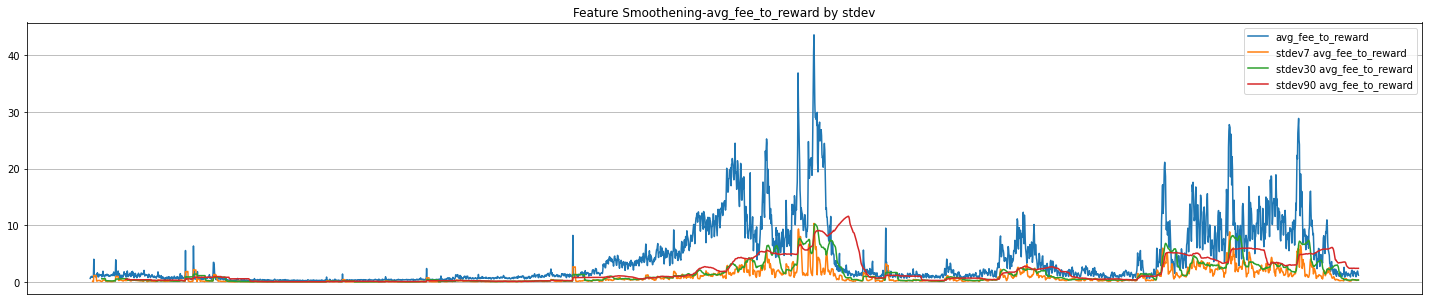

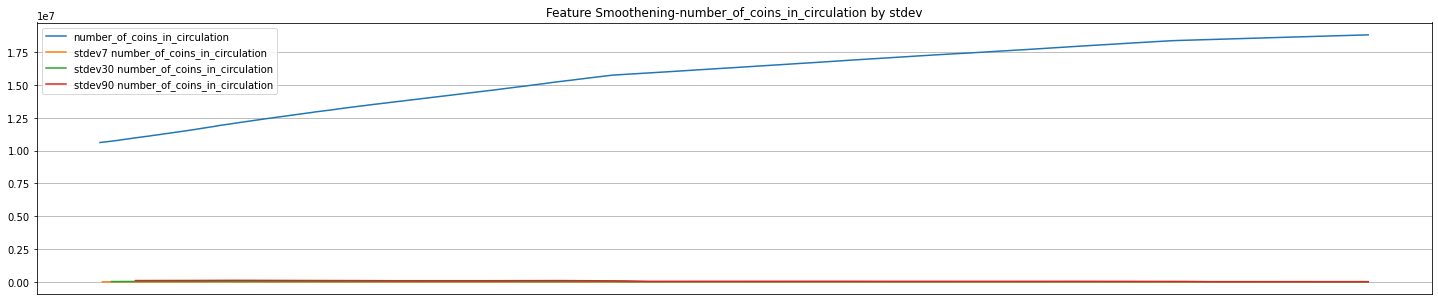

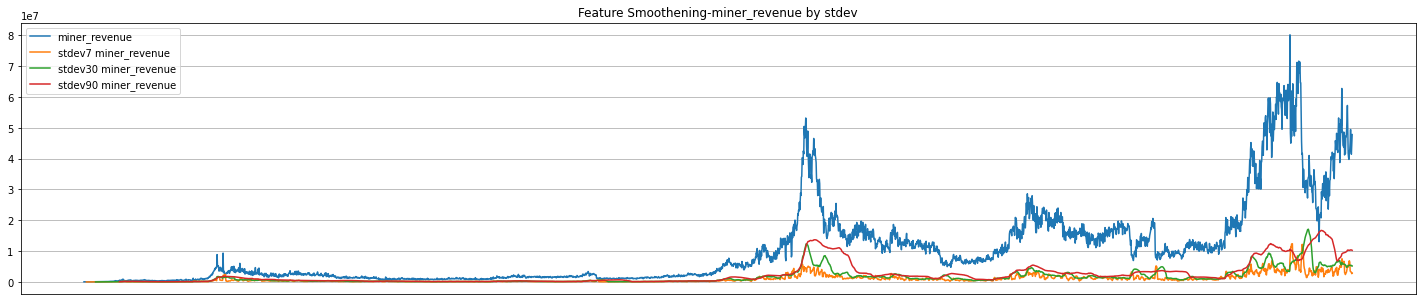

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'stdev',show_plot=True)

## Variance
* Variance is another statistical measure of market volatility, measuring how widely feature values are dispersed from the average feature values. 
* It is interpreted similar to standard deviation as varaince is square of standadrd deviation

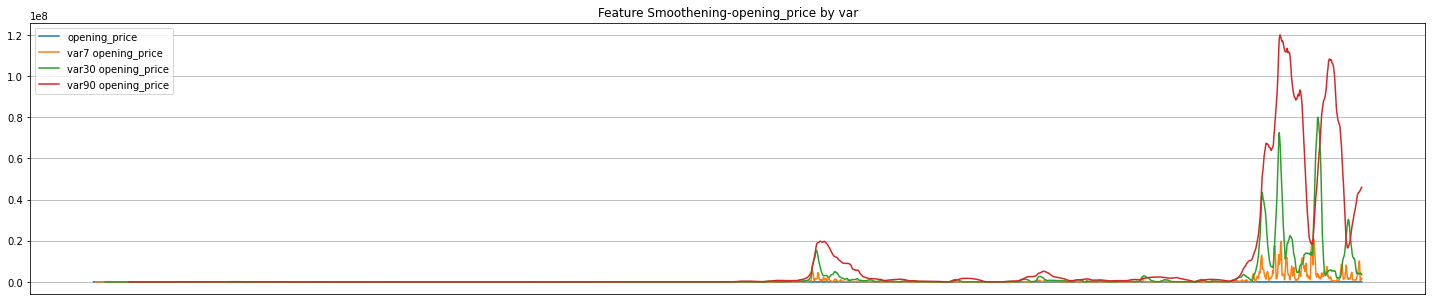

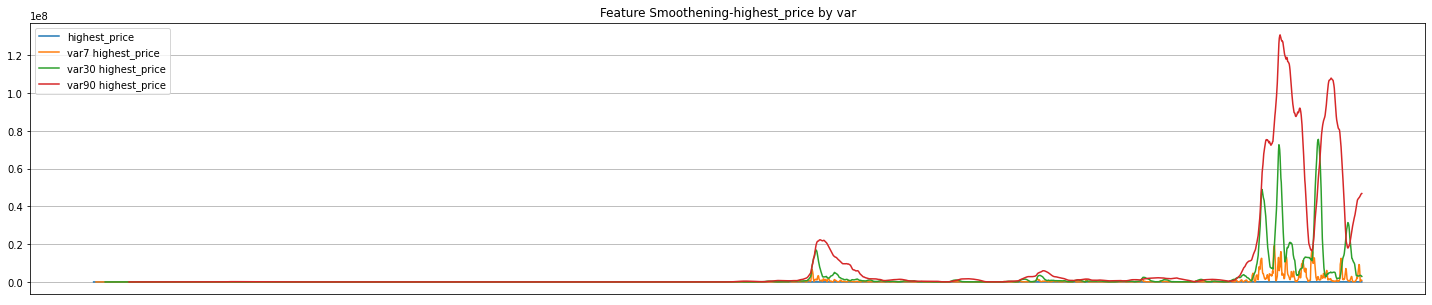

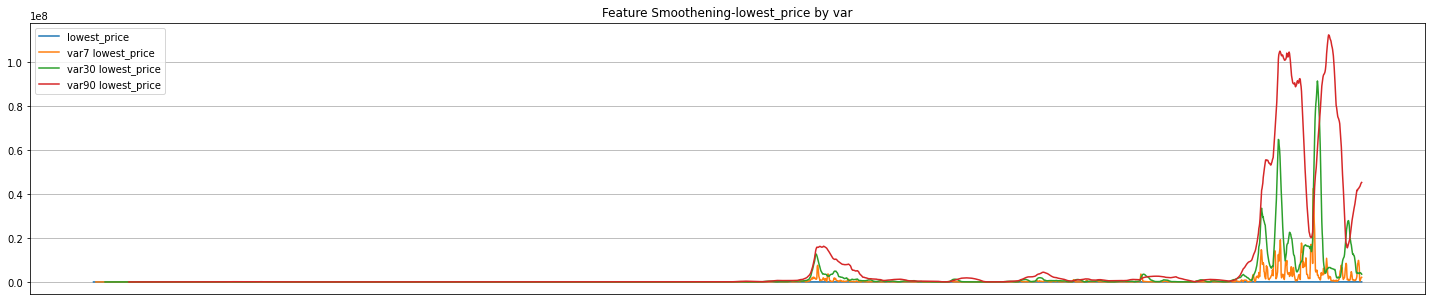

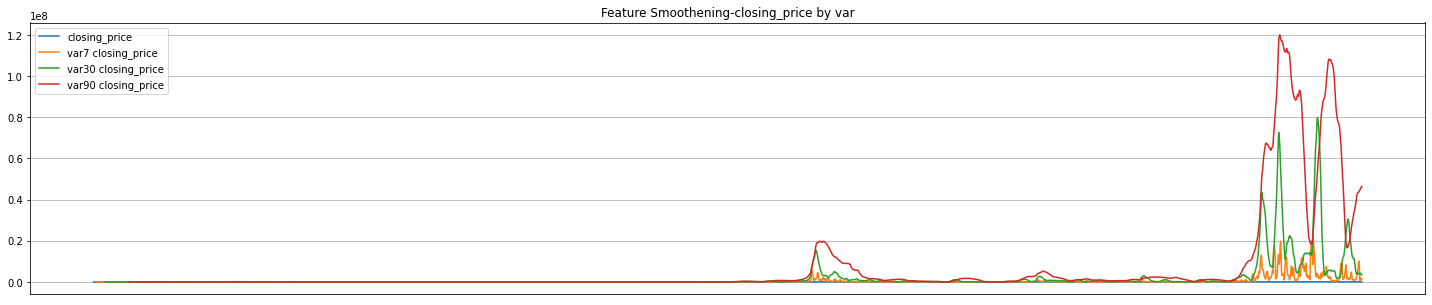

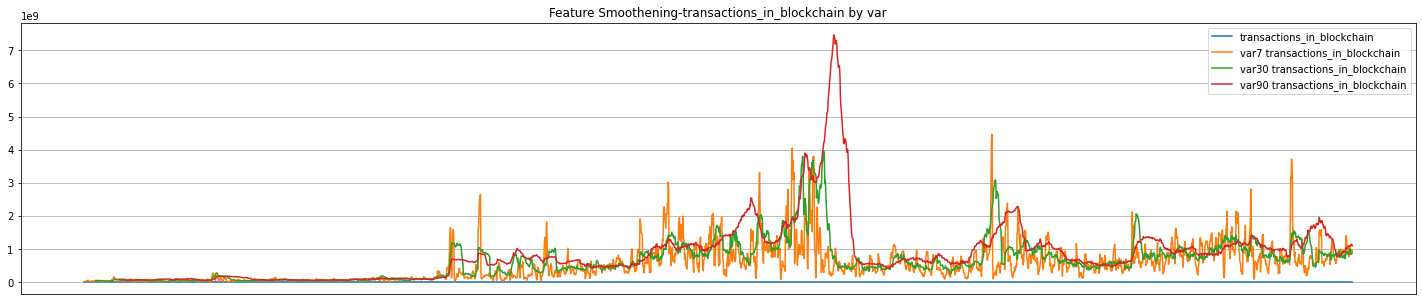

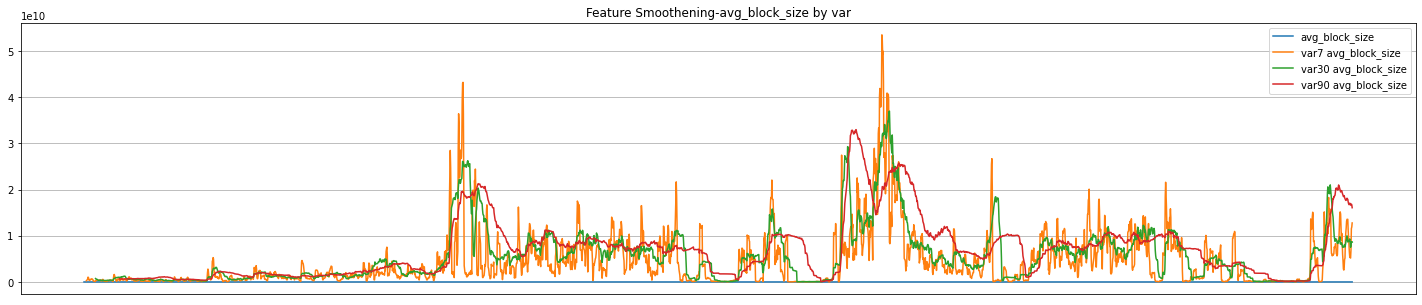

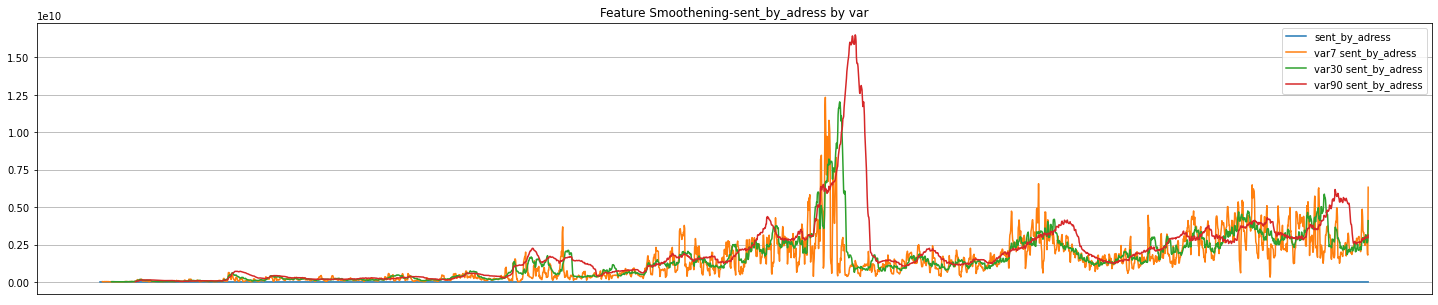

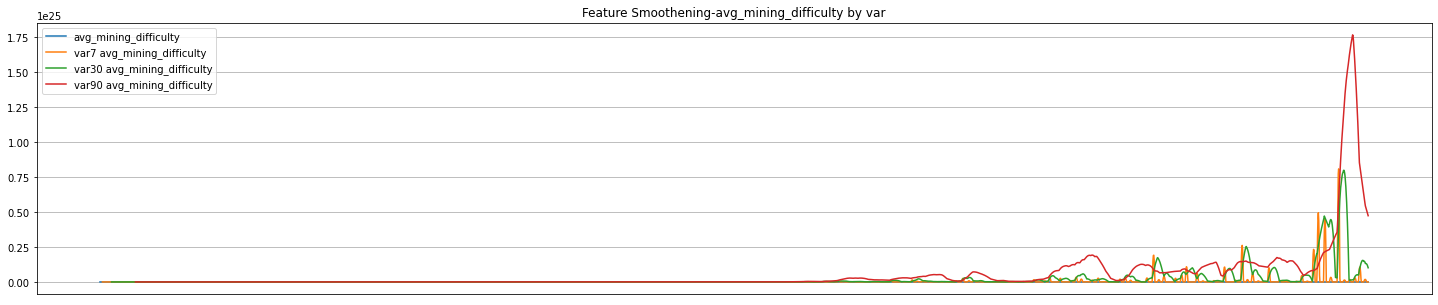

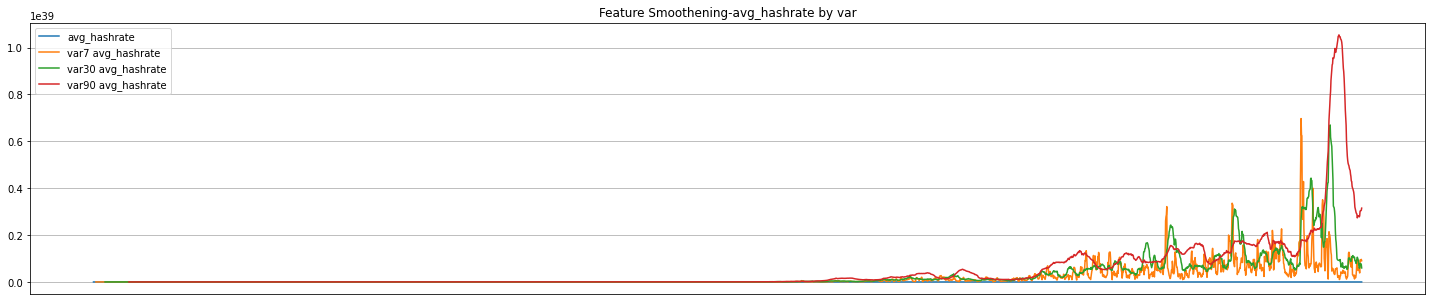

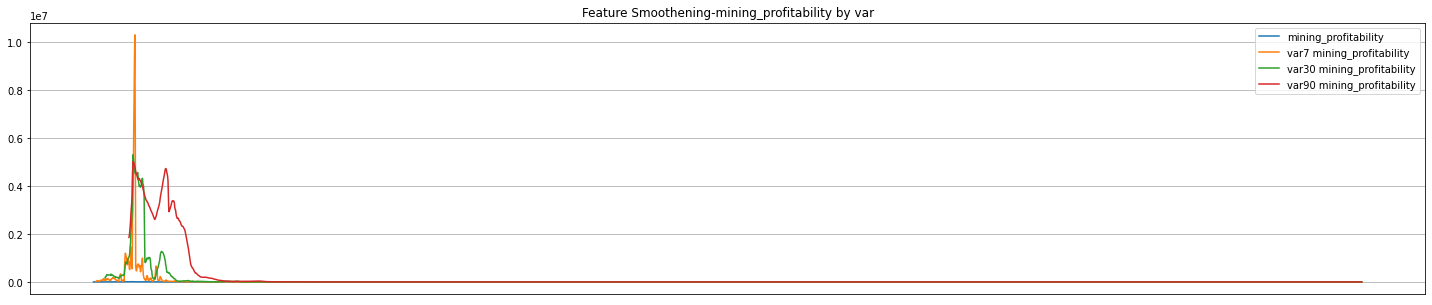

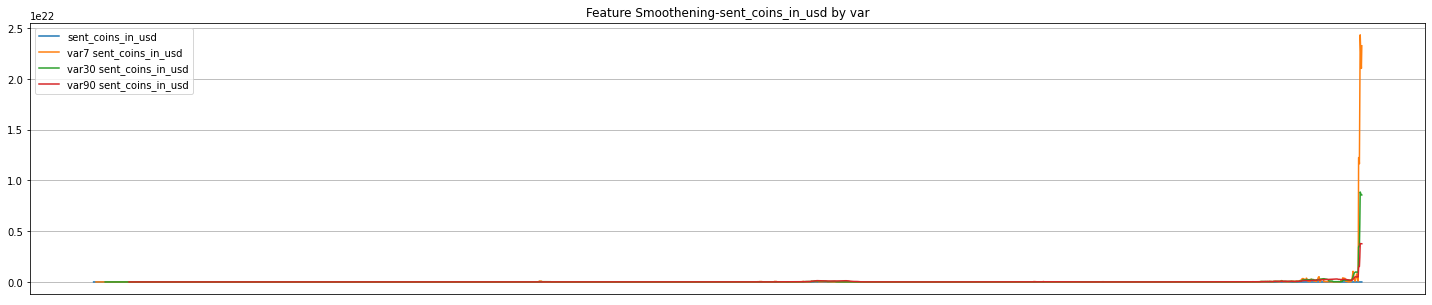

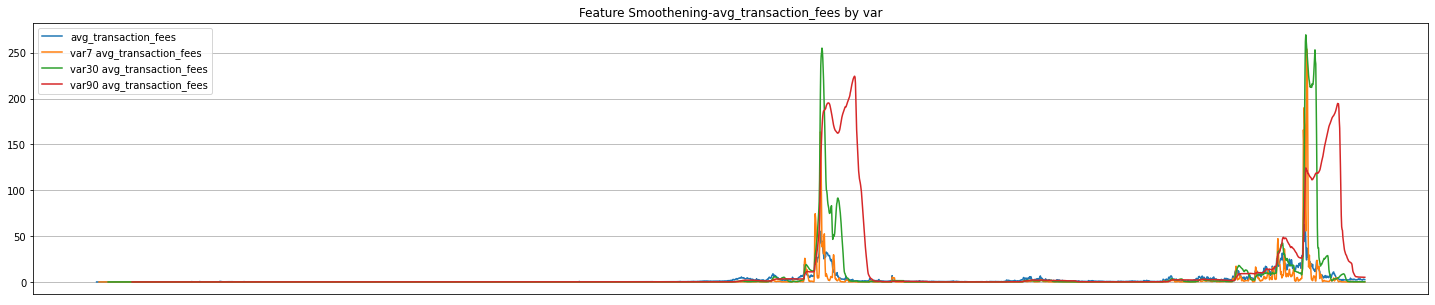

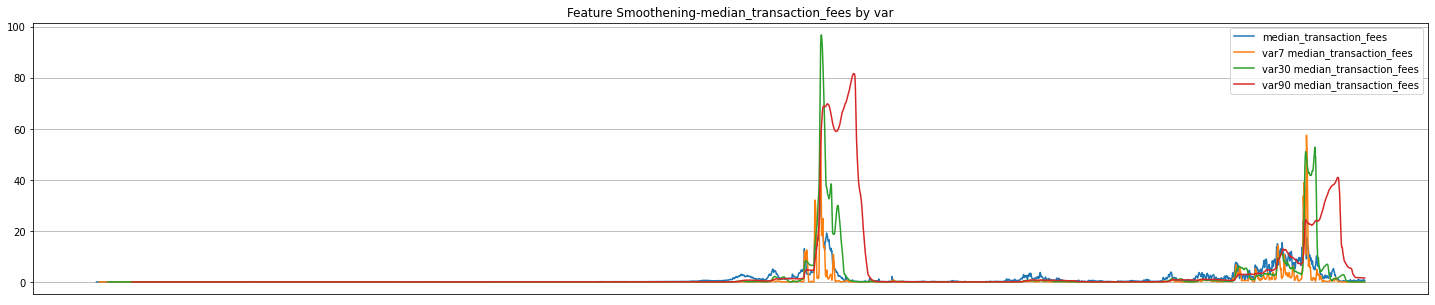

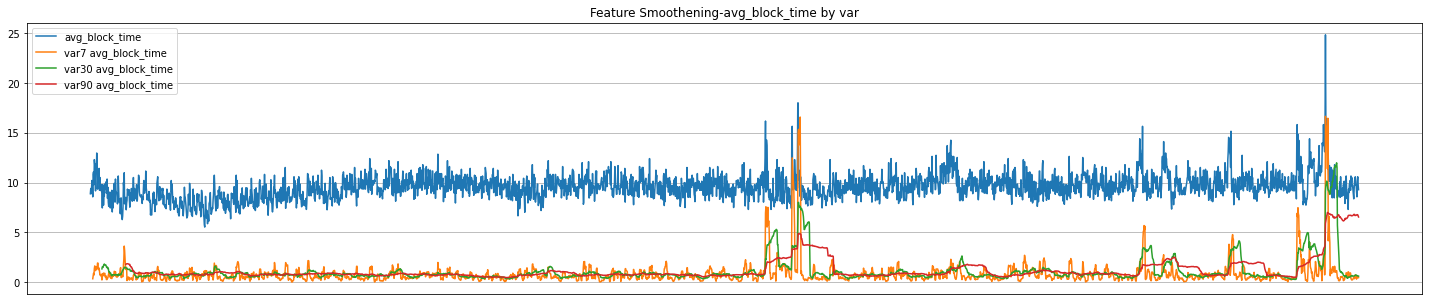

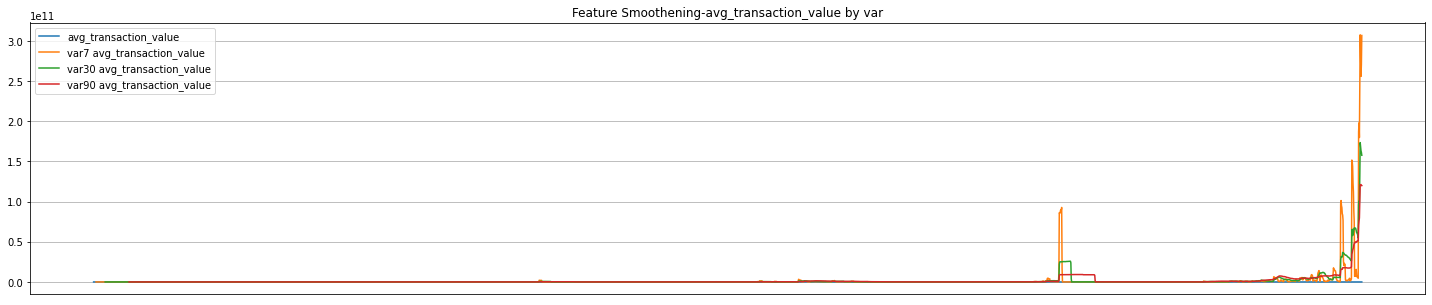

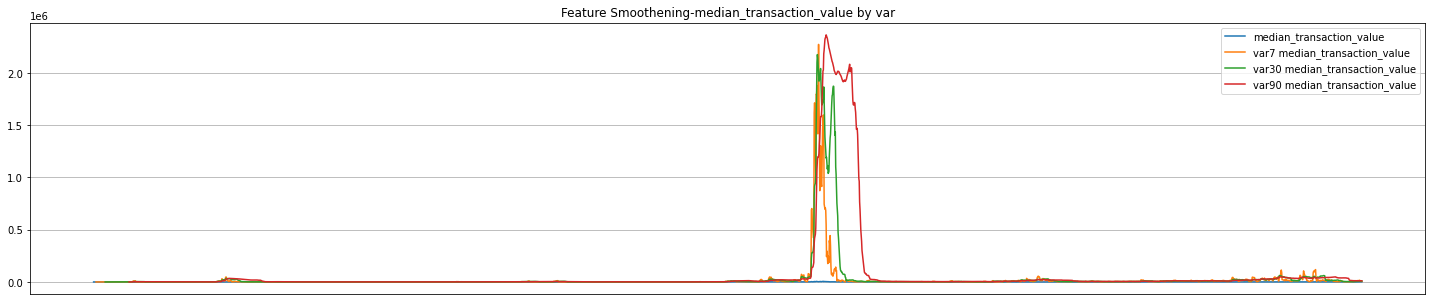

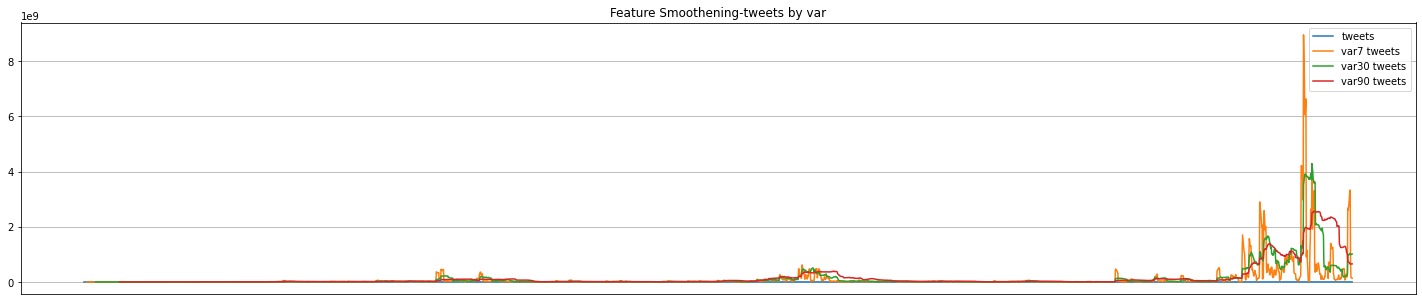

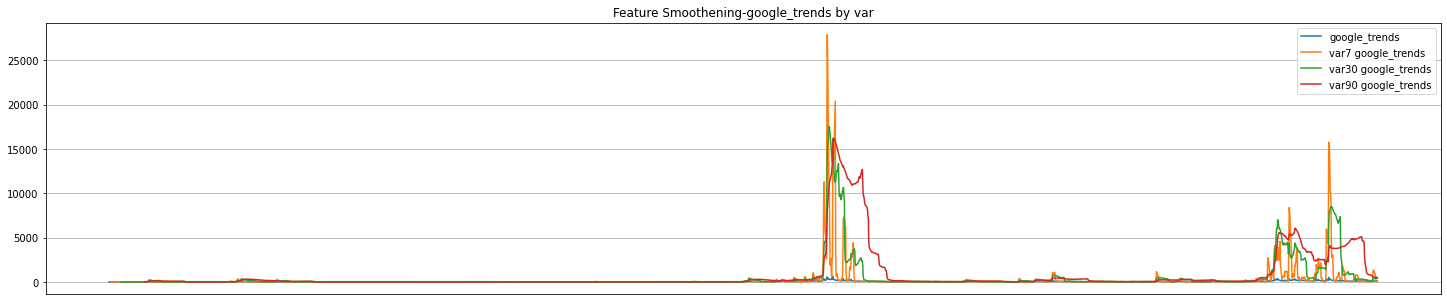

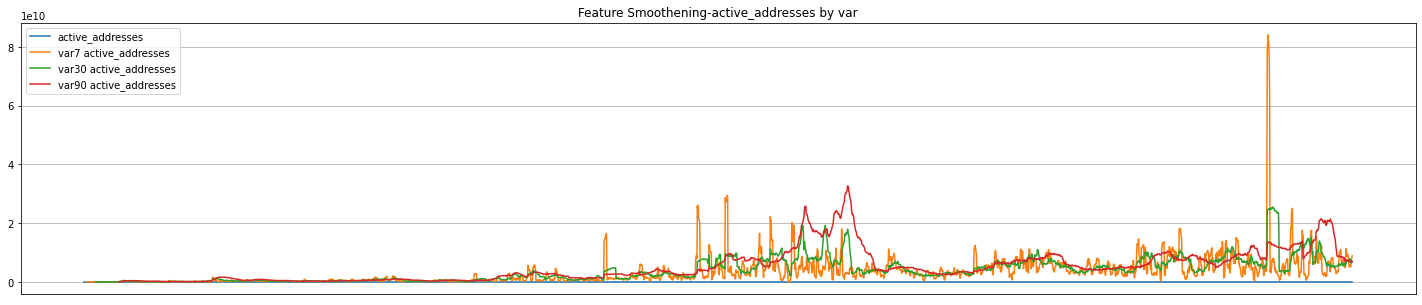

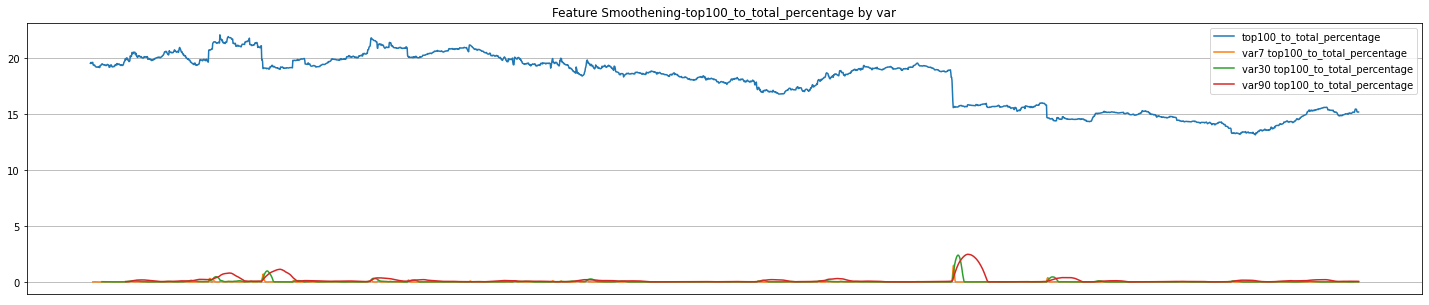

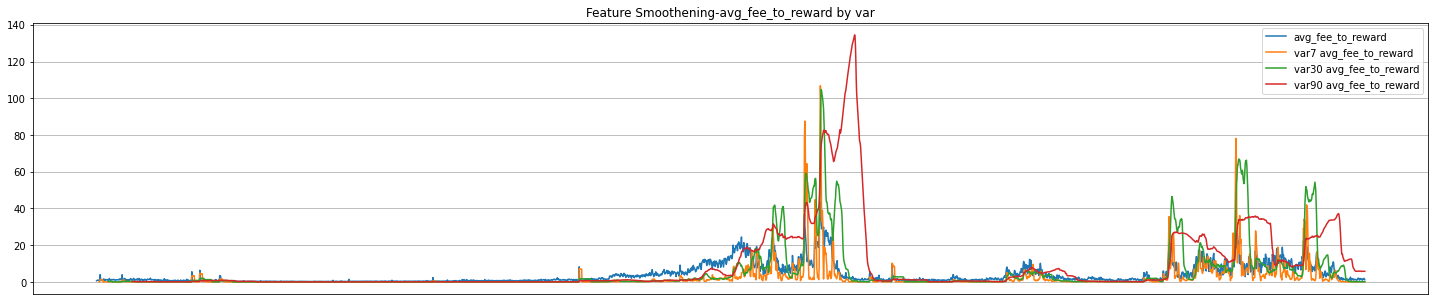

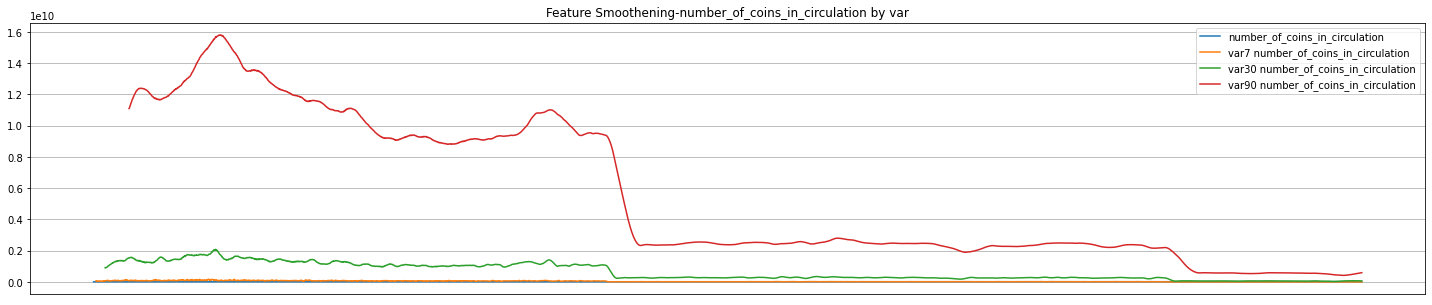

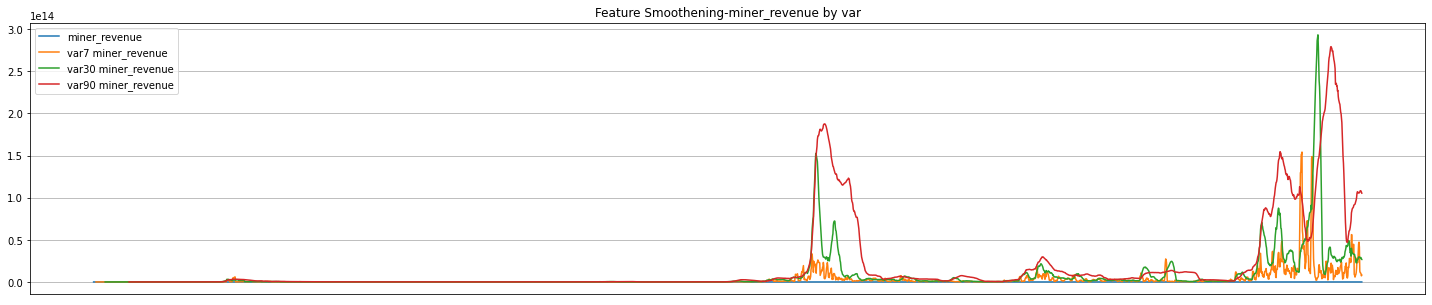

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'var',show_plot=True)

## Relative Strength Index

> RSI = 100 – 100 / (1 + RS)

> RS = Average of X periods closes up / Average of X periods closes down

An asset is considered oversold or undervalued when the RSI drops below 30. On the other hand, it's deemed to be overbought if the RSI goes above 70.

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'rsi',show_plot=True,show_original_Feature_in_plot=False)

## Rate of Change
* Measures the percentage change in price between the current feature value and the feature a certain number of periods ago.e.g., 7,30,90

*   A rising ROC above zero typically confirms an uptrend while a falling ROC below zero indicates a downtrend.






In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'roc',show_plot=True,show_original_Feature_in_plot=False)

## Bollinger Bands
* Bollinger Bands are envelopes (Upper and Lower range levels) plotted at a standard deviation level above and below a simple moving average of the price. Because the distance of the bands is based on standard deviation, they adjust to volatility swings in the underlying price.


```
Upper band: n-day SMA + (n-day standard deviation x2)
Lower band: n-day SMA – (n-day standard deviation x2)

```

* Bollinger bands help determine whether values are high or low on a relative basis. They are used in pairs, both upper and lower bands and in conjunction with a moving average. Further, the pair of bands is not intended to be used on its own. Use the pair to confirm signals given with other indicators.


In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'bband_lower',show_plot=True)

In [ ]:
for feature in feature_list:
    if feature not in ['Date','weekday', 'year', 'month','7th_day_avg_price','30th_day_avg_price','90th_day_avg_price','avg_btc_price']:
        feature_smoothening(final_df,feature,'bband_upper',show_plot=True)

## Moving Average Convergence Divergence
The MACD represents a trend following indicator that highlights whether the short-term price momentum is moving in the same direction as the long-term price momentum, and in cases where it's not, then it's used to determine if a trend change is near. The MACD consists of four components.

MACD line- shows the variation between the slow moving average and the fast-moving average

Signal line-for signaling fluctuations in price momentum

Histogram- indicates the difference between the signal line and the MACD line.



In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'macd',show_plot=True,show_original_Feature_in_plot=False)

## Final Processing and saving file

In [ ]:
final_df = final_df[(final_df['Date'] >= '2013-04-01')].fillna(method='bfill')

In [ ]:
final_df.shape

(3093, 853)

In [ ]:
final_df.to_csv('/content/drive/MyDrive/Self Case studies/CS01 Bitcoin Price Forecasting/Data/02 Feature Engineered Data/final_data_after_feat_engg_20210909.csv')